# Tarea 4. Visión computacional

Guillermo Segura Gómez

## Exercice 1 (Property of the convolution operator)
Let $F$ be the operator defined, for $f \in L^1(\mathbb{R})$, by
$$
F(f): u \longmapsto \int_{\mathbb{R}} f(x) e^{-2 i \pi x u} d x,
$$
where $i$ the imaginary complex number.
Given $f, g \in L^1(\mathbb{R})$, show that $F(f * g)=F(f) F(g)$.

---

La convolución de dos funciones $f$ and $g$ definidas en los relaes $\mathbb{R}$ se definen por la siguiente integral:

$$
(f * g)(x) = \int_{\mathbb{R}} f(\tau) g(x - \tau) d\tau
$$

Para demostrar la propiedad $F(f * g) = F(f)F(g)$ para el operador $F$, aplicamos la definición de convolución para las funciones $f$ y $g$, al operador $F$.

Dado $F(f): u \mapsto \int_{\mathbb{R}} f(x) e^{-2 i \pi x u} dx$, para la convolución $f * g$, se tiene lo siguiente:

$$
F(f * g): u \mapsto \int_{\mathbb{R}} (f * g)(x) e^{-2 i \pi x u} dx
$$

Utilizando la definición de convolución dentro de la integral tenemos:

$$
F(f * g): u \mapsto \int_{\mathbb{R}} \left( \int_{\mathbb{R}} f(\tau) g(x - \tau) d\tau \right) e^{-2 i \pi x u} dx
$$

Ahora, recordando un resultado del análisis matemático, el teorema de Fubini [1] establece que si tienes una función $f(x, y)$ que es integrable en el producto de espacios medibles $X \times Y$, entonces la integral de $f$ sobre $X \times Y$ puede ser computada como una integral iterada de dos maneras, siempre y cuando la integral absoluta de $f$ sobre $X \times Y$ sea finita. En términos más formales:

Si $f: X \times Y \rightarrow \mathbb{R}$ es una función medible tal que $\int_{X \times Y} |f(x, y)| d(x, y) < \infty$, entonces:

1. La función $f$ es integrable sobre $X \times Y$.
2. Las funciones $x \mapsto \int_Y f(x, y) dy$ y $y \mapsto \int_X f(x, y) dx$ son integrables sobre $X$ y $Y$, respectivamente.
3. Se cumple que:
   $$
   \int_{X \times Y} f(x, y) d(x, y) = \int_X \left( \int_Y f(x, y) dy \right) dx = \int_Y \left( \int_X f(x, y) dx \right) dy
   $$

En otras palabras, si la función $f(x, y)$ y su valor absoluto son suficientemente "buenos" (es decir, medibles e integrables), entonces se puede calcular la integral doble de $f$ sobre el dominio $X \times Y$ como una serie de dos integrales iteradas, y el orden en que se realizan estas integrales no altera el resultado final.

Podemos utilizar teorema de Fubini, para cambiar el orden de integración, se sigue que:

$$
\int_{\mathbb{R}} \left( \int_{\mathbb{R}} f(\tau) g(x - \tau) d\tau \right) e^{-2 i \pi x u} dx = \int_{\mathbb{R}} f(\tau) \left( \int_{\mathbb{R}} g(x - \tau) e^{-2 i \pi x u} dx \right) d\tau
$$

Ahora, si observamos la integral de la derecha, tenemos lo siguiente:

$$
\left( \int_{\mathbb{R}} g(x - \tau) e^{-2 i \pi x u} dx \right)
$$

Realizando la sustitución $y = x - \tau$, lo que implica que $dx = dy$. La integral se convierte en:

$$
\int_{\mathbb{R}} g(y) e^{-2 i \pi (y + \tau) u} dy
$$

Entonces

$$
F(f * g): u \mapsto \int_{\mathbb{R}} f(\tau) \left( \int_{\mathbb{R}} g(y) e^{-2 i \pi (y + \tau) u} dy \right) d\tau
$$

La exponencial tiene una dependencia en $\tau$, por la propiedad de la suma de las exponenciales y por el hecho de que le integral interna no depende de $\tau$, sacamos el término exponencial que depende de esa variable, por lo cual nos queda

$$
F(f * g): u \mapsto \int_{\mathbb{R}} f(\tau) \left( \int_{\mathbb{R}} g(y) e^{-2 i \pi (y) u} dy \right) e^{-2 i \pi (\tau) u} d\tau
$$

se sigue separando las integrales ya que en este punto sus variables son independientes

$$
F(f * g): u \mapsto \int_{\mathbb{R}} f(\tau) e^{-2 i \pi (\tau) u} d\tau \left( \int_{\mathbb{R}} g(y) e^{-2 i \pi (y) u} dy \right)
$$

Por la definición de $F$ encontramos que parte derecha es la aplicación de $F$ a las funciones $f$ y $g$, por lo que

$$
F(f * g): u \mapsto F(f) F(g)
$$

que era lo que queríamos demostrar. Por lo tanto queda demostrado.

## Exercice 2 (Noise removal with median filter)
The median filter is an image processing technique which consists of, for each pixel of a grey-level image, calculating the median value in a neighborhood of the pixel for some window size determined previously by the user (See Fig. 0.1). This is a well-known simple technique to remove the noise in images.

The aim of this exercise is to determine the best strategy to denoise a color image using
the median filter.
1. Implement the median filter technique for one-channel images :
- inputs : a one-channel image and a window size.
- output : denoised image.
For simplicity, do not apply the filter when it exceeds the image domain.

---

El **filtro mediano** es una técnica de filtrado no lineal, se utiliza en el procesamiento de imágenes, especialmente eficaz para eliminar el ruido de tipo "sal y pimienta". Este tipo de ruido se caracteriza por la presencia de píxeles aislados que son notablemente más brillantes o más oscuros que el área circundante.

La operación básica del filtro mediano implica reemplazar cada píxel de la imagen por la mediana de los píxeles en su vecindad, definida por un tamaño de ventana específico (por ejemplo, 3x3, 5x5, etc.). A diferencia de la media, que es el promedio de los valores, la mediana es el valor central de un conjunto de números, lo que hace que el filtro sea menos sensible a los valores extremos y por lo tanto más efectivo para mantener los bordes mientras se reduce el ruido.

Una de las principales ventajas del filtro mediano es su capacidad para preservar los bordes de la imagen mientras elimina el ruido, a diferencia de otros filtros como el gaussiano que pueden difuminar los bordes. Esto lo hace particularmente útil en aplicaciones de visión por computadora donde la preservación de bordes es crítica.

El proceso de aplicación del filtro mediano implica los siguientes pasos:
1. Centrar una ventana de tamaño predefinido sobre cada píxel de la imagen.
2. Recolectar los valores de los píxeles dentro de esta ventana.
3. Ordenar estos valores.
4. Reemplazar el valor del píxel central por la mediana de este conjunto ordenado.

En el contexto de imágenes en escala de grises, esto se aplica directamente ya que cada píxel tiene un solo valor de intensidad. Para imágenes en color, el proceso puede aplicarse de forma independiente a cada canal de color o convertirse primero a una representación más adecuada que separe la luminancia del color, aplicando el filtro solo a la componente de luminancia para evitar distorsiones de color.

El filtrado mediano también tiene algunas limitaciones, como su tendencia a eliminar pequeños detalles junto con el ruido y su relativamente alto costo computacional en comparación con algunos otros filtros. Sin embargo, sigue siendo una herramienta valiosa en la caja de herramientas de procesamiento de imágenes debido a su eficacia y simplicidad.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from scipy.ndimage import median_filter

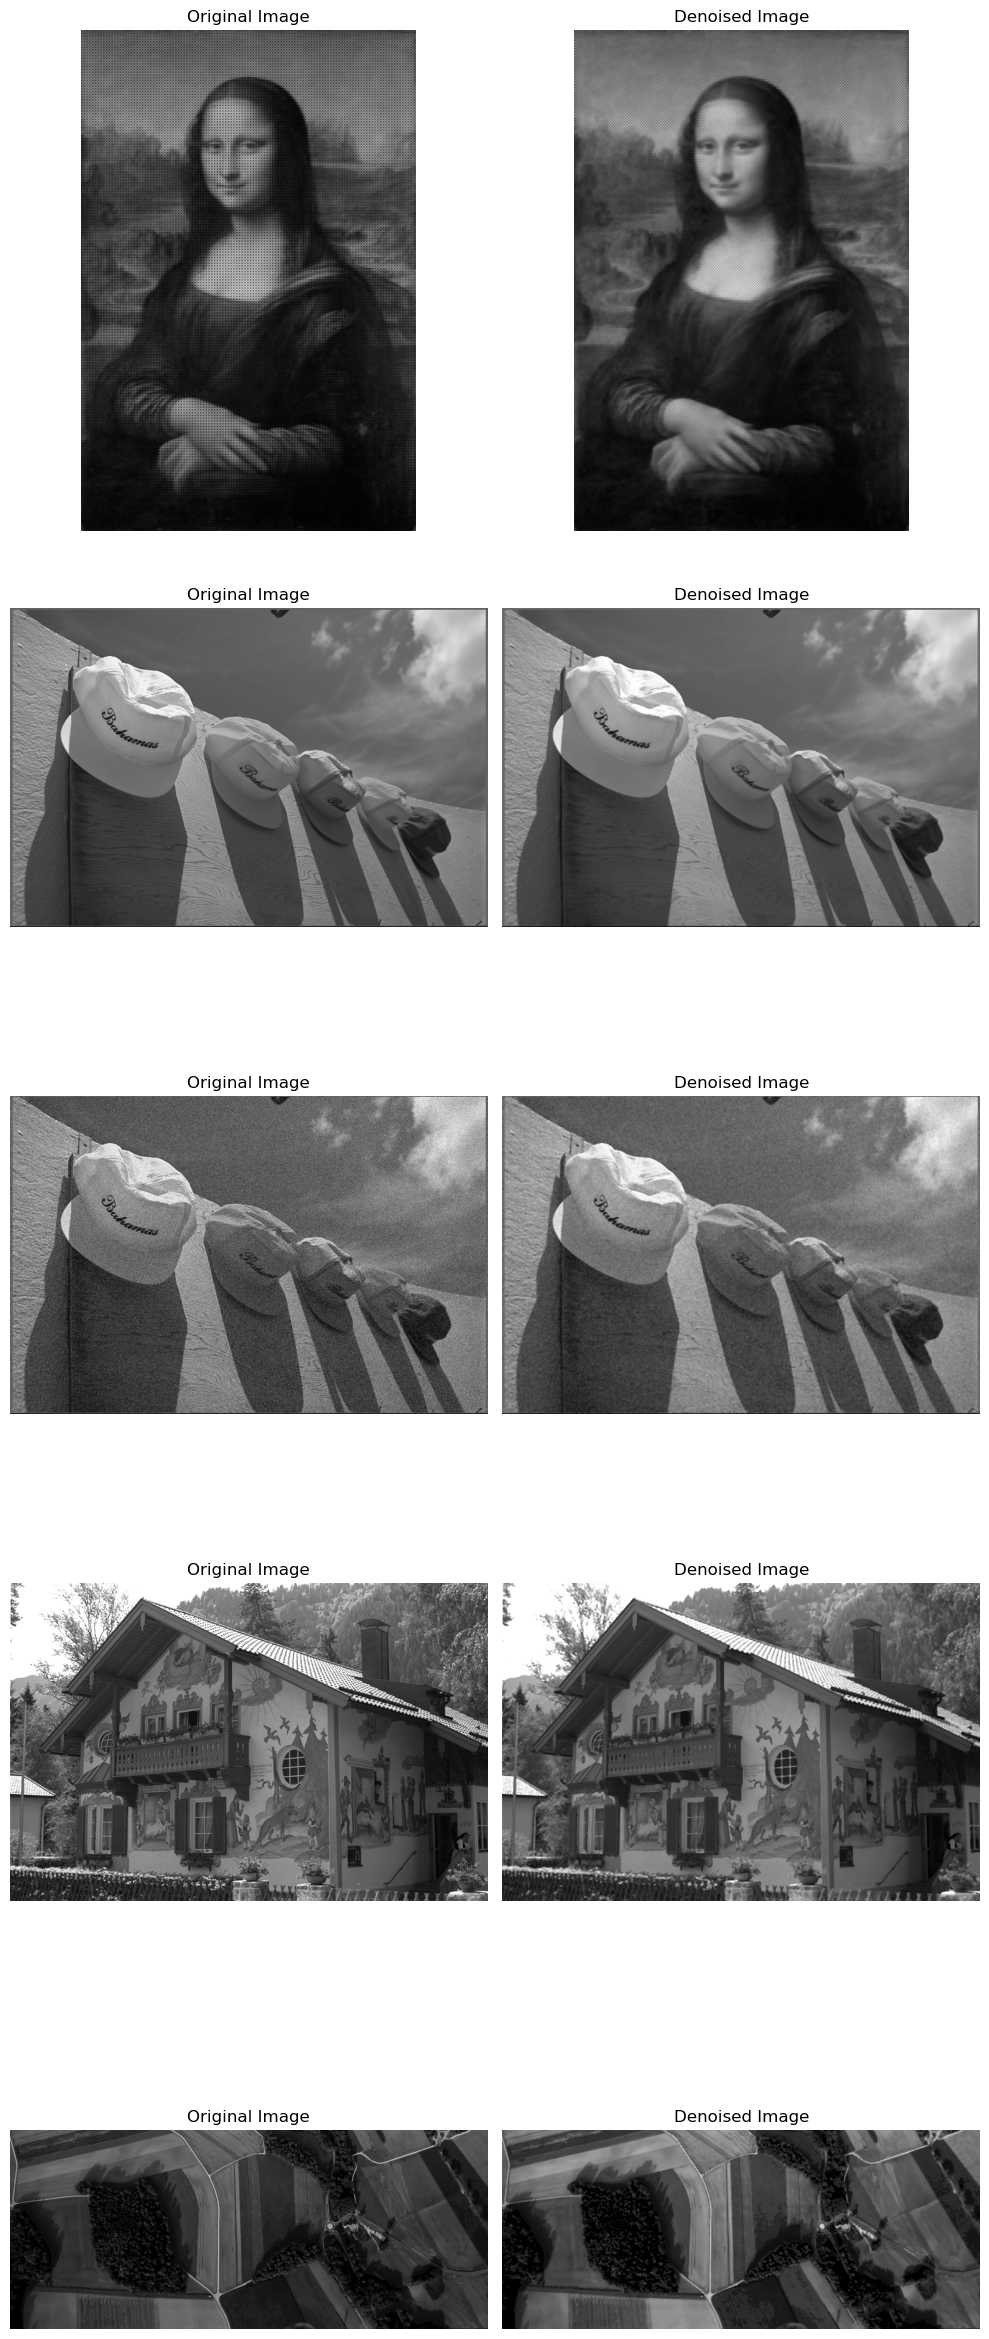

In [10]:
def apply_median_filter(image, window_size):
    # Aplica el filtro mediano usando scipy
    denoised_image = median_filter(image, size=window_size)
    return denoised_image

# Path a las imágenes
images = glob.glob('/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/*.png')

# Inicializamos la figura para graficar
plt.figure(figsize=(10, len(images) * 5))

for i, img_path in enumerate(images):
    # Lee la imagen en escala de grises
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Aplica el filtro mediano
    filtered_img = apply_median_filter(img, window_size=3)

    # Muestra la imagen original
    plt.subplot(len(images), 2, 2*i + 1)
    plt.imshow(img, cmap='gray')
    plt.title("Imagen original")
    plt.axis('off')

    # Muestra la imagen procesada
    plt.subplot(len(images), 2, 2*i + 2)
    plt.imshow(filtered_img, cmap='gray')
    plt.title("Imagen sin ruido")
    plt.axis('off')

plt.tight_layout()
plt.show()

2. Implement the median filter technique for color images :
- inputs : a color image, three window sizes (one per component) and a color space (RGB or
Opp).
- output : the denoised image expressed in RGB after applying the method implemented in 1. to each of the components of the image in the selected color space and with the selected window sizes.

3. Apply the method implemented in 2. to the image noisy−img1.png. You’ll test different
color spaces and different window sizes. Evaluate your result by computing the PSNR between
the denoised image and the original clean image img1.png. Which strategy provides
the best results ?
4. Analyze your results.

In [3]:
images

['/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img3.png',
 '/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img1.png',
 '/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/noisy_img1.png',
 '/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img2.png',
 '/home/guillermosegura/Desktop/Segundo Semestre/ComputerVision/Tarea 4/img4.png']

## Exercice 3 (Edge-preserving regularization)
Convolving an image with a Gaussian kernel not only reduces the noise but smoothes the edges as well. The aim of this exercise is to construct a simple edge-preserving image regularization method which generalizes the convolution with a Gaussian.
Let $I_0=\left(I_0^1, I_0^2, I_0^3\right): \Omega \subset \mathbb{R}^2 \longrightarrow \mathbb{R}^3$ be a color image expressed in the $R G B$ color space. We consider the following regularization operator
$$
I^c(i, j)=\sum_{(k, l) \in \Omega_{(i, j)}} K_\sigma((i, j),(k, l)) I_0^c(k, l) \quad c=1,2,3
$$
where $\Omega_{(i, j)}$ is a neighborhood of $(i, j)$, and the kernel $K_\sigma((i, j),(k, l))$ generalizes the 2D Gaussian kernel in the sense that $K_\sigma$ is of the form
$$
K_\sigma((i, j),(k, l))=A e^{-\frac{d((i, j),(k, l))^2}{2 \sigma^2}}
$$
for some distance function $d: \Omega \times \Omega \longrightarrow \mathbb{R}^{+}$. The term $A$ is the normalization factor, i.e $A$ is such that
$$
\sum_{(k, l) \in \Omega_{(i, j)}} K_\sigma((i, j),(k, l))=1 .
$$
1. Determine a distance function $d$ such that :
- $d((i, j),(k, l))$ is small if the pixels $(i, j)$ and $(k, l)$ are close to each other and the color vectors $I_0(i, j)$ and $I_0(k, l)$ are close to each other.
- $d((i, j),(k, l))$ is high if the pixels $(i, j)$ and $(k, l)$ are far from each other and the color vectors $I_0(i, j)$ and $I_0(k, l)$ are far from each other.

Reminder : a distance function satisfies three properties : identity, symmetry and triangular inequality.
2. Apply the operator (0.1) to the image img2.png where:
- the distance $d$ in (0.2) is the one constructed in question 1.
- the kernel $K_\sigma$ in (0.2) has a support of size $5 \times 5$, and $\sigma=10$.
- The $R G B$ values of $I_0$ are normalized (i.e. the values are in the range [0,1]).

## Exercice 4 (Demosaicking)
The camera sensor produces an image in which for each pixel we only get one of the image
channel intensity values (either red, green or blue) as we can see in Fig. 0.2.
It is then required to find an estimate of the other two missing values to obtain RGB value
at each pixel. This is done by an interpolation process called demosaicking, which produces
an image with 3 channels. (see Fig. 0.3 and Fig. 0.4).

The following figure describes a simple interpolation method. Here, the given pixel has only
the red channel intensity, and green and blue values at this pixel are interpolated according
to the 2 formulas.

1. Implement the demosaicking method described in Fig. 0.5. For simplification, do not perform
interpolation at the boundary of the image domain (set the boundary values of the
demosaicked image to (0,0,0)).
2. Apply the interpolation to the images img3.png and img4.png.

# Bibliografía 

[1] Rudin, Walter. Principles of mathematical analysis. Vol. 3. New York: McGraw-hill, 1964.